## Cleaning and Engineering

In [1]:
import pandas as pd
import os
import category_encoders as ce

SOURCE = 'Downloads\\Project\\'

deaths = pd.read_csv(os.path.join(SOURCE + 'filmdeathcounts.csv'))

In [2]:
deaths.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


In [70]:
deaths.shape

(545, 7)

In [3]:
deaths = deaths.drop('Director', axis=1)

In [4]:
deaths.columns

Index(['Film', 'Year', 'Body_Count', 'MPAA_Rating', 'Genre', 'Length_Minutes',
       'IMDB_Rating'],
      dtype='object')

In [5]:
deaths.isna().sum()

Film              0
Year              0
Body_Count        0
MPAA_Rating       0
Genre             0
Length_Minutes    0
IMDB_Rating       0
dtype: int64

In [6]:
column_names = ['film',
                'year',
                'body_count', 
                'mpaa_rating',
                'genre',
                'length_minutes',
                'imdb_rating']

deaths.columns = column_names

In [78]:
deaths.head()

,film,year,body_count,mpaa_rating,genre,length_minutes,imdb_rating
0,24 Hour Party People,2002,7,R,Biography,117,7.3
1,28 Days Later,2002,53,R,Horror,113,7.6
2,28 Weeks Later,2007,212,R,Horror,100,7.0
3,30 Days of Night,2007,67,R,Horror,113,6.6
4,300,2007,600,R,Action,117,7.7


In [8]:
deaths['genre'] = deaths['genre'].str.slice(stop = 5)

In [9]:
deaths = deaths.replace('Actio', 'Action')
deaths = deaths.replace('Comed', 'Comedy')
deaths = deaths.replace('Adven', 'Adventure')
deaths = deaths.replace('Horro', 'Horror')
deaths = deaths.replace('Biogr', 'Biography')
deaths = deaths.replace('Weste', 'Western')
deaths = deaths.replace('Anima', 'Animation')
deaths = deaths.replace('Myste', 'Mystery')
deaths = deaths.replace('Fanta', 'Fantasy')
deaths = deaths.replace('Thril', 'Thriller')
deaths = deaths.replace('Film-', 'Film-Noir')
deaths = deaths.replace('Docum', 'Documentary')
deaths = deaths.replace('Sci-F', 'Science Fiction')
deaths = deaths.replace('War|D', 'War Drama')

In [10]:
deaths['genre'].unique()

array(['Biography', 'Horror', 'Action', 'Adventure', 'Crime', 'Drama',
       'Comedy', 'Western', 'Animation', 'Fantasy', 'Science Fiction',
       'Thriller', 'Mystery', 'War Drama', 'Film-Noir', 'Documentary'],
      dtype=object)

## Exploring

In [11]:
import pandas_profiling

pandas_profiling.ProfileReport(deaths)

In [12]:
deaths.describe()

,year,body_count,length_minutes,imdb_rating
count,545.000000,545.000000,545.000000,545.000000
mean,1995.387156,72.115596,116.146789,6.835963
std,12.389609,92.630013,22.712811,1.113516
min,1949.000000,1.000000,79.000000,2.000000
25%,1989.000000,15.000000,100.000000,6.200000
50%,1999.000000,44.000000,112.000000,6.900000
75%,2005.000000,93.000000,127.000000,7.600000
max,2013.000000,836.000000,216.000000,9.300000


In [77]:
deaths[deaths['year'] == 1949]

,film,year,body_count,mpaa_rating,genre,length_minutes,imdb_rating
488,The Third Man,1949,4,Approved,Film-Noir,104,8.4


In [75]:
deaths[deaths['imdb_rating'] == 2]

,film,year,body_count,mpaa_rating,genre,length_minutes,imdb_rating
189,House of the Dead,2003,141,R,Action,90,2.0


In [76]:
deaths[deaths['imdb_rating'] == 9.3]

,film,year,body_count,mpaa_rating,genre,length_minutes,imdb_rating
481,The Shawshank Redemption,1994,4,R,Crime,142,9.3


In [15]:
deaths[deaths['length_minutes'] == 216]

#3 hours and 36 minutes long!!!

,film,year,body_count,mpaa_rating,genre,length_minutes,imdb_rating
223,Lawrence of Arabia,1962,180,PG,Adventure,216,8.4


In [16]:
deaths[deaths['body_count'] == 836]

,film,year,body_count,mpaa_rating,genre,length_minutes,imdb_rating
241,Lord of the Rings: Return of the King,2003,836,PG-13,Action,201,8.9


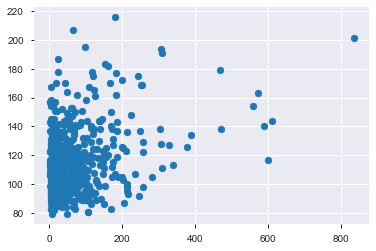

In [74]:
import matplotlib.pyplot as plt

x = deaths['body_count']
y = deaths['length_minutes']

plt.scatter(x, y)
plt.xlabel = 'Body Count'
plt.ylabel = 'Length (Minutes)'
plt.title = 'Body Count vs. Length of Movie'
plt.show();

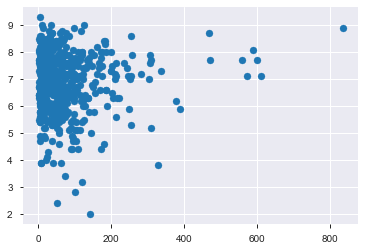

In [18]:
x = deaths['body_count']
y = deaths['imdb_rating']

plt.scatter(x, y)
plt.xlabel = 'Body Count'
plt.ylabel = 'IMDB Rating'
plt.show();

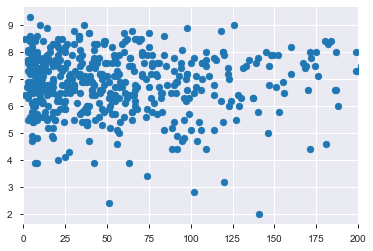

In [52]:
x = deaths['body_count']
y = deaths['imdb_rating']

plt.scatter(x, y)
plt.xlabel = 'Body Count'
plt.ylabel = 'IMDB Rating'
plt.xlim(0, 200)
plt.show();

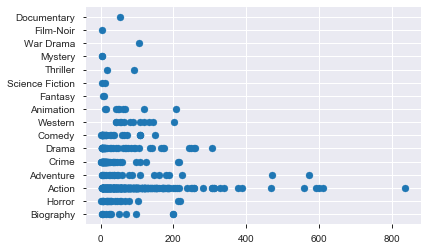

In [49]:
x = deaths['body_count']
y = deaths['genre']

plt.scatter(x, y)
plt.xlabel = 'Body Count'
plt.ylabel = 'Genre'
plt.show();

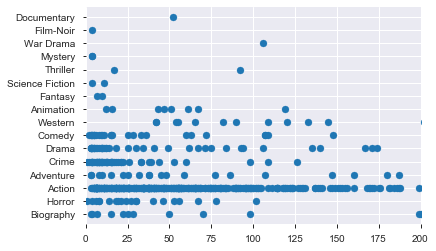

In [51]:
x = deaths['body_count']
y = deaths['genre']

plt.scatter(x, y)
plt.xlabel = 'Body Count'
plt.ylabel = 'Genre'
plt.xlim(0, 200)
plt.show();

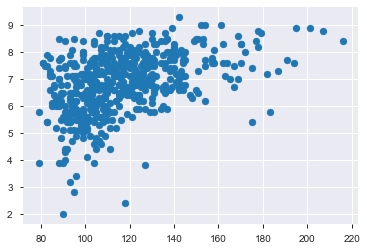

In [67]:
x = deaths['length_minutes']
y = deaths['imdb_rating']

plt.scatter(x, y)
plt.xlabel = 'Body Count'
plt.ylabel = 'Genre'
plt.show();

In [20]:
import seaborn as sns

In [ ]:
sns.pairplot(deaths)

## Genre-Specific

In [53]:
western = deaths[deaths['genre'] == 'Western']
comedy = deaths[deaths['genre'] == 'Comedy']
drama = deaths[deaths['genre'] == 'Drama']
crime = deaths[deaths['genre'] == 'Crime']
adventure = deaths[deaths['genre'] == 'Adventure']
action = deaths[deaths['genre'] == 'Action']
horror = deaths[deaths['genre'] == 'Horror']
biography = deaths[deaths['genre'] == 'Biography']

In [57]:
western['body_count'].describe()

count     12.000000
mean      94.916667
std       48.810316
min       42.000000
25%       54.750000
50%       86.000000
75%      123.250000
max      202.000000
Name: body_count, dtype: float64

In [58]:
comedy['body_count'].describe()

count     27.000000
mean      33.666667
std       41.074042
min        2.000000
25%        5.000000
50%       15.000000
75%       48.000000
max      148.000000
Name: body_count, dtype: float64

In [59]:
drama['body_count'].describe()

count     44.000000
mean      70.295455
std       86.043142
min        3.000000
25%        7.750000
50%       27.500000
75%       97.000000
max      307.000000
Name: body_count, dtype: float64

In [60]:
crime['body_count'].describe()

count     51.000000
mean      29.196078
std       45.752386
min        1.000000
25%        8.000000
50%       13.000000
75%       24.000000
max      214.000000
Name: body_count, dtype: float64

In [61]:
adventure['body_count'].describe()

count     23.000000
mean     111.130435
std      145.741772
min        3.000000
25%       23.500000
50%       48.000000
75%      153.500000
max      572.000000
Name: body_count, dtype: float64

In [62]:
action['body_count'].describe()

count    334.000000
mean      81.982036
std       99.431053
min        3.000000
25%       25.250000
50%       55.000000
75%       98.000000
max      836.000000
Name: body_count, dtype: float64

In [63]:
horror['body_count'].describe()

count     22.000000
mean      49.136364
std       59.426862
min        1.000000
25%       15.000000
50%       28.500000
75%       55.250000
max      217.000000
Name: body_count, dtype: float64

In [64]:
biography['body_count'].describe()

count     12.000000
mean      60.083333
std       71.016590
min        3.000000
25%       13.000000
50%       26.500000
75%       77.000000
max      200.000000
Name: body_count, dtype: float64

## Machine Learning

In [36]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [37]:
# Read data

traintest = deaths

# Split into train & test sets

traintest_bcount = traintest['body_count'].unique()
train_bcount, testval_bcount = train_test_split(
    traintest_bcount, random_state=42)
train = traintest[traintest.body_count.isin(train_bcount)]
testval = traintest[traintest.body_count.isin(testval_bcount)]

#Read data again

traintest = testval

# Split into validation & test sets

traintest_bcount = traintest['body_count'].unique()
val_bcount, test_bcount = train_test_split(
    traintest_bcount, random_state=42)
val = traintest[traintest.body_count.isin(val_bcount)]
test = traintest[traintest.body_count.isin(test_bcount)]

train.shape, val.shape, test.shape

((399, 7), (112, 7), (34, 7))

In [38]:
import numpy as np

target = 'body_count'

x_train = train.drop(columns=target)
x_val = val.drop(columns=target)
x_test = test.drop(columns=target)

y_train = train[target]
y_val = val[target]

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [39]:
#Validation Score

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

pipeline = make_pipeline(ce.OrdinalEncoder(),
                        RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs=-1))

pipeline.fit(x_train, y_train_log)

y_pred_log = pipeline.predict(x_val)

print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 1.0994468352616291


In [40]:
from sklearn.model_selection import train_test_split

# Read data

traintest = deaths

# Split into train & test sets

traintest_rating = traintest['imdb_rating'].unique()
train_rating, testval_rating = train_test_split(
     traintest_rating, random_state=42)
train = traintest[traintest.imdb_rating.isin(train_rating)]
testval = traintest[traintest.imdb_rating.isin(testval_rating)]

#Read data again

traintest = testval

# Split into validation & test sets

traintest_rating = traintest['imdb_rating'].unique()
val_rating, test_rating = train_test_split(
     traintest_rating, random_state=42)
val = traintest[traintest.imdb_rating.isin(val_rating)]
test = traintest[traintest.imdb_rating.isin(test_rating)]

train.shape, val.shape, test.shape

((412, 7), (113, 7), (20, 7))

In [41]:
import numpy as np

target = 'imdb_rating'

x_train = train.drop(columns=target)
x_val = val.drop(columns=target)
x_test = test.drop(columns=target)

y_train = train[target]
y_val = val[target]

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [42]:
#Validation Score

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

model = RandomForestRegressor

pipeline = make_pipeline(ce.OrdinalEncoder(),
                         RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs=-1))

pipeline.fit(x_train, y_train_log)

y_pred_log = pipeline.predict(x_val)

print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 0.16221820267694212


## XGBoost

In [43]:
from xgboost import XGBRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

encoder = ce.OrdinalEncoder()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.transform(x_val)

eval_set = [(x_train_encoded, y_train_log),
           (x_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=2000, n_jobs=-1)
model.fit(x_train_encoded, y_train_log,
        eval_set = eval_set, eval_metric = 'rmse', early_stopping_rounds = 50)

[20:26:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.40728	validation_1-rmse:1.38451
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.26859	validation_1-rmse:1.2461
[2]	validation_0-rmse:1.14385	validation_1-rmse:1.1217
[3]	validation_0-rmse:1.03168	validation_1-rmse:1.00993
[4]	validation_0-rmse:0.930868	validation_1-rmse:0.909571
[5]	validation_0-rmse:0.840284	validation_1-rmse:0.819494
[6]	validation_0-rmse:0.75892	validation_1-rmse:0.738909
[7]	validation_0-rmse:0.685816	validation_1-rmse:0.666246
[8]	validation_0-rmse:0.620242	validation_1-rmse:0.601455
[9]	validation_0-rmse:0.561393	validation_1-rmse:0.543498
[10]	validation_0-rmse:0.508663	validation_1-rmse:0.49157
[11]	validation_0-rmse:0.46134	validation_1-rmse:0.456489
[12]	validation_0-rmse:0.419012	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

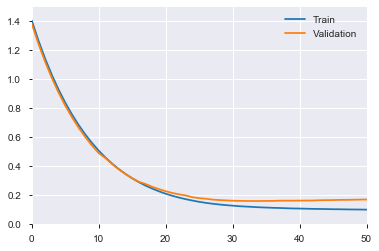

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

results = model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']
epoch = range(len(train_rmse))
plt.plot(epoch, train_rmse, label='Train')
plt.plot(epoch, val_rmse, label='Validation')
plt.ylim(0,1.5)
plt.xlim(0, 50)
plt.legend();

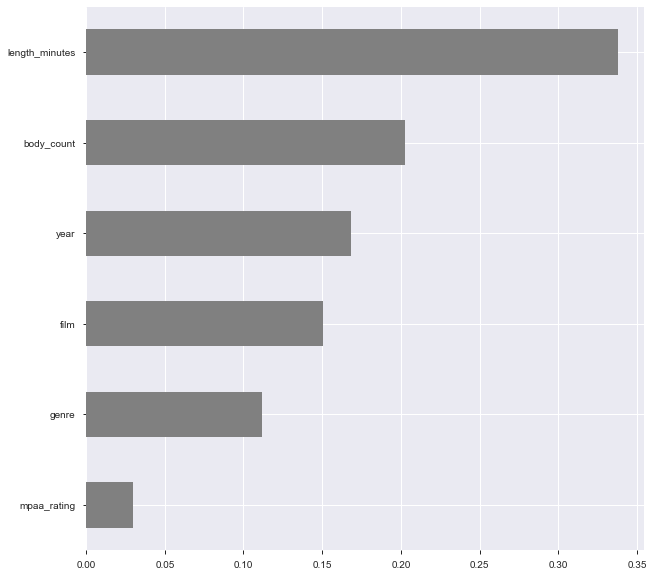

In [45]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(x_train, y_train_log)
y_pred_log = pipeline.predict(x_val)
rmse(y_val_log, y_pred_log)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, x_train.columns)
importances.sort_values().plot.barh(color='grey');